<h1 style = "color: green">Homework for Introduction in Neural Networks</h1>

<h4 style = "color: yellow">1. Libraries</h4>

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
import seaborn as sns

<h4 style = "color: yellow">2. Data Importing and Visualization</h4>

In [4]:
# fashion mnist dataset
train_csv = pd.read_csv('./fashion-mnist_train.csv')
test_csv = pd.read_csv('./fashion-mnist_test.csv')

In [5]:
# train_csv
train_csv.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# test,csv
test_csv.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h4 style = "color: yellow">3. Data Preprocessing</h4>

In [16]:
# spliting train_csv for features and labels
X_train = train_csv.drop('label', axis = 1)
y_train = train_csv['label']

# labels
y_train[:10]

0    2
1    9
2    6
3    0
4    3
5    4
6    4
7    5
8    4
9    8
Name: label, dtype: int64

In [17]:
# spliting test_csv for features and labels
X_test = test_csv.drop('label', axis = 1)
y_test = test_csv['label']

# labels
y_test[10::-1]

10    3
9     0
8     5
7     6
6     8
5     2
4     3
3     2
2     2
1     1
0     0
Name: label, dtype: int64

In [18]:
# Normalization of features (0, 1)
X_train /= 255.0
X_test /= 255.0

# example 
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


<h4 style = "color: yellow">4. Exploratory Data Analysis (EDA)</h4>

In [20]:
# reshape the data in 28x28 shape for plotting the images
X_train_reshape = X_train.values.reshape(-1, 28, 28)

In [21]:
# classess names
col_name = [' T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

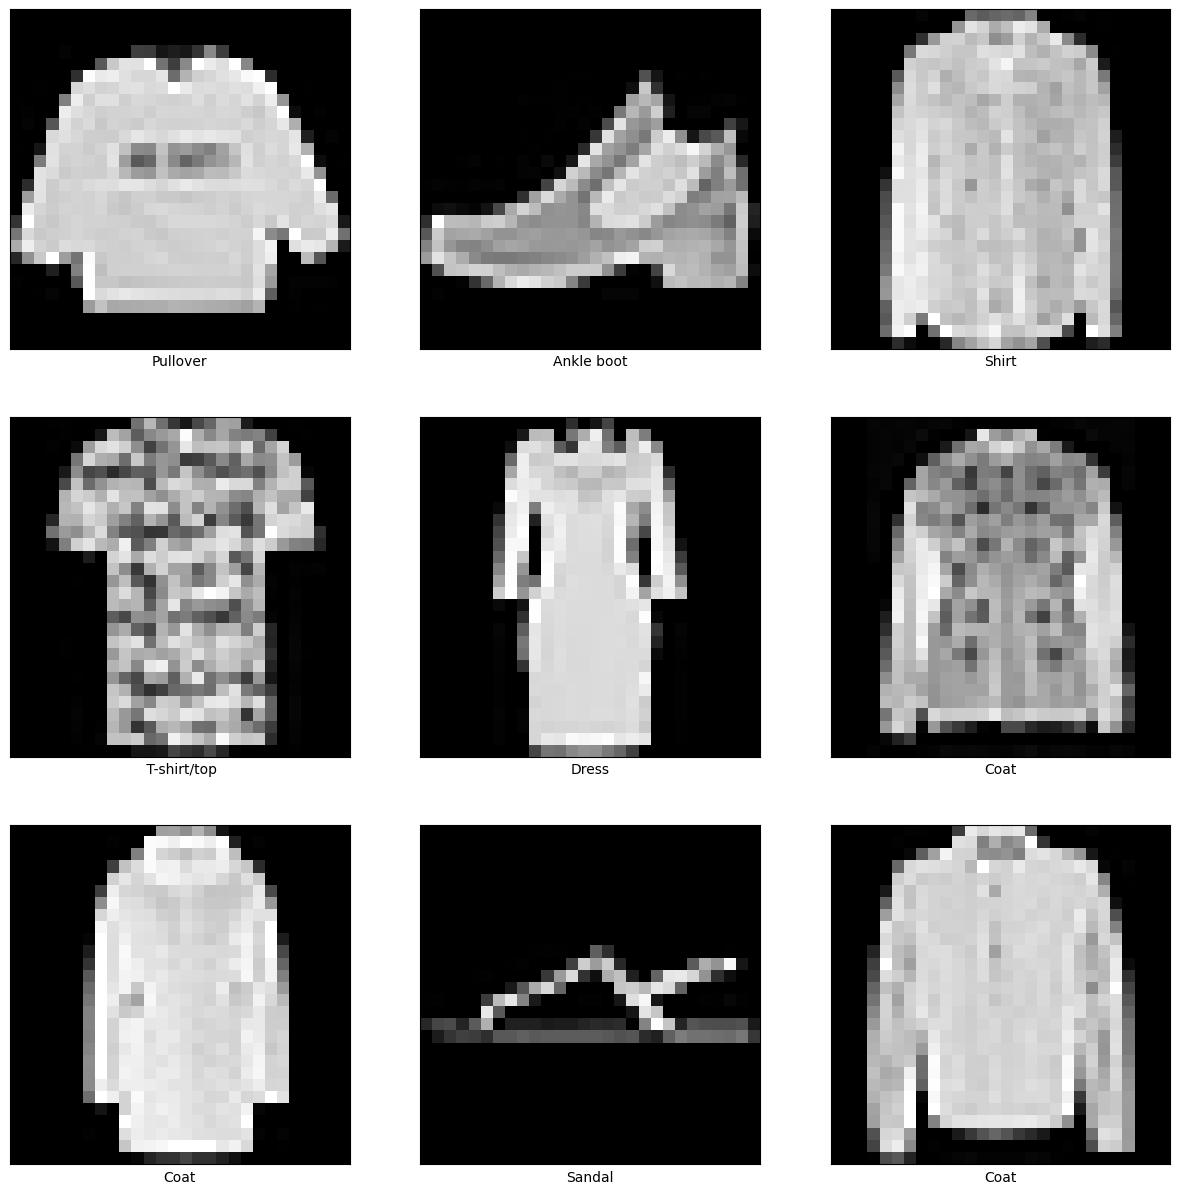

In [24]:
# display the images
plt.figure(figsize = (15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_reshape[i], cmap = 'gray')
    plt.xlabel(col_name[y_train[i]])

<h4 style = "color: yellow">5. Model training, prediction and evaluation</h4>

In [49]:
# model arhitecture

# he_normal = random initial weights values, prevents vanishing/exploding gradients
# avoids dying Relu problem, it allows small gradient negative values
# batch normalization, normalizes the inputs of a layer
# l2 = adds a penalty Ridge to the loss function => w^2
model = Sequential([
    Dense(128, input_shape = (784,), kernel_initializer = 'he_normal', kernel_regularizer = l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha = 0.01),
    
    Dense(256, kernel_initializer = 'he_normal', kernel_regularizer = l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha = 0.01),
    Dropout(0.3),
    
    Dense(128, kernel_initializer = 'he_normal', kernel_regularizer = l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha = 0.01),
    Dropout(0.3),
    
    Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               33024     
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)              

In [50]:
# compile the model
model.compile(optimizer = Adam(learning_rate = 0.0005), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [51]:
# train the model
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 15,
    verbose = 1,
    restore_best_weights = True
)

reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.1,
    patience = 5,
    min_lr = 1e-6,
    verbose = 1
)
history = model.fit(X_train, y_train, batch_size = 64, epochs = 100, validation_data = (X_test, y_test), callbacks = [early_stopping, reduce_lr])


Epoch 1/100
938/938 [==============================] - 4s 3ms/step - loss: 0.6987 - accuracy: 0.7930 - val_loss: 0.4788 - val_accuracy: 0.8612 - lr: 5.0000e-04
Epoch 2/100
938/938 [==============================] - 3s 3ms/step - loss: 0.5086 - accuracy: 0.8553 - val_loss: 0.4391 - val_accuracy: 0.8718 - lr: 5.0000e-04
Epoch 3/100
938/938 [==============================] - 3s 3ms/step - loss: 0.4614 - accuracy: 0.8679 - val_loss: 0.4432 - val_accuracy: 0.8694 - lr: 5.0000e-04
Epoch 4/100
938/938 [==============================] - 3s 3ms/step - loss: 0.4345 - accuracy: 0.8760 - val_loss: 0.4361 - val_accuracy: 0.8721 - lr: 5.0000e-04
Epoch 5/100
938/938 [==============================] - 3s 3ms/step - loss: 0.4108 - accuracy: 0.8816 - val_loss: 0.4290 - val_accuracy: 0.8731 - lr: 5.0000e-04
Epoch 6/100
938/938 [==============================] - 3s 3ms/step - loss: 0.3934 - accuracy: 0.8867 - val_loss: 0.4065 - val_accuracy: 0.8763 - lr: 5.0000e-04
Epoch 7/100
938/938 [===================

In [52]:
# extract the accuracy and loss
acc = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

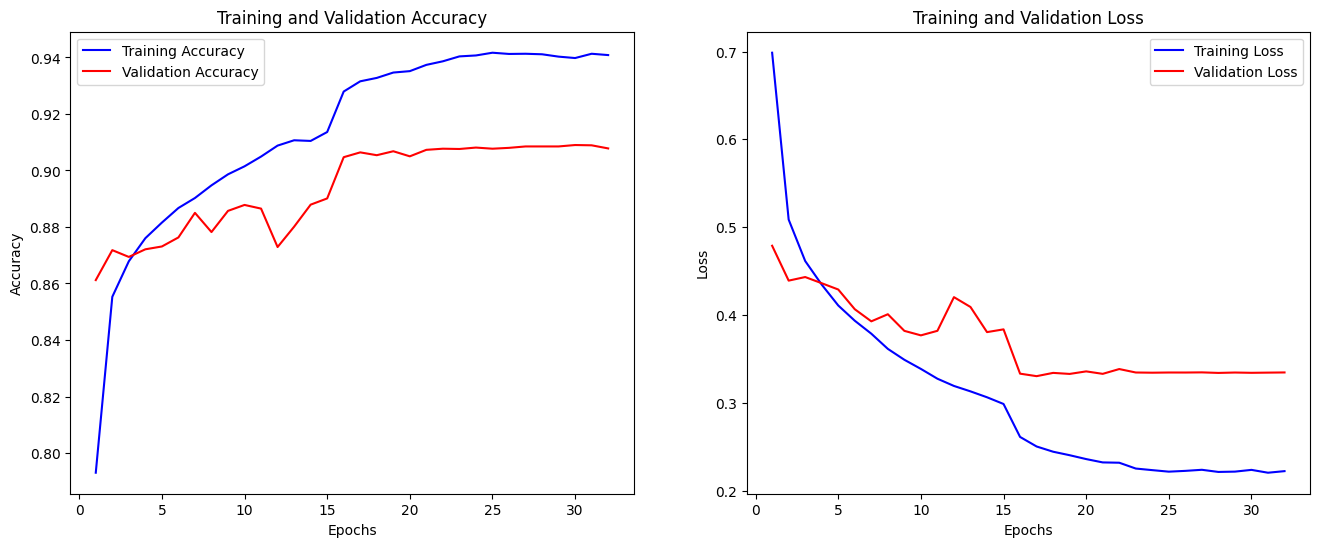

In [ ]:
# data numerical graphs accuracy & loss
epochs = range(1, len(history.history['accuracy']) + 1)  
acc = history.history['accuracy']  
val_acc = history.history['val_accuracy']  #
loss = history.history['loss']  
val_loss = history.history['val_loss']  

plt.figure(figsize=(16, 6))

# Training and Validation Accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training and Validation Loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

313/313 [==============================] - 0s 943us/step


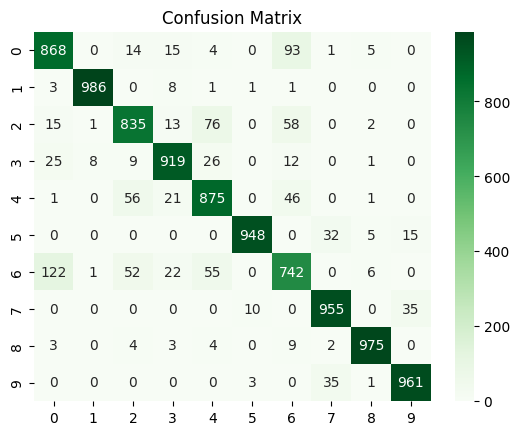

In [70]:
# confusion matrix
y_predict = model.predict(X_test)
y_predict = np.argmax(y_predict, axis = 1)
conf_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Greens')
plt.title('Confusion Matrix')
plt.show()